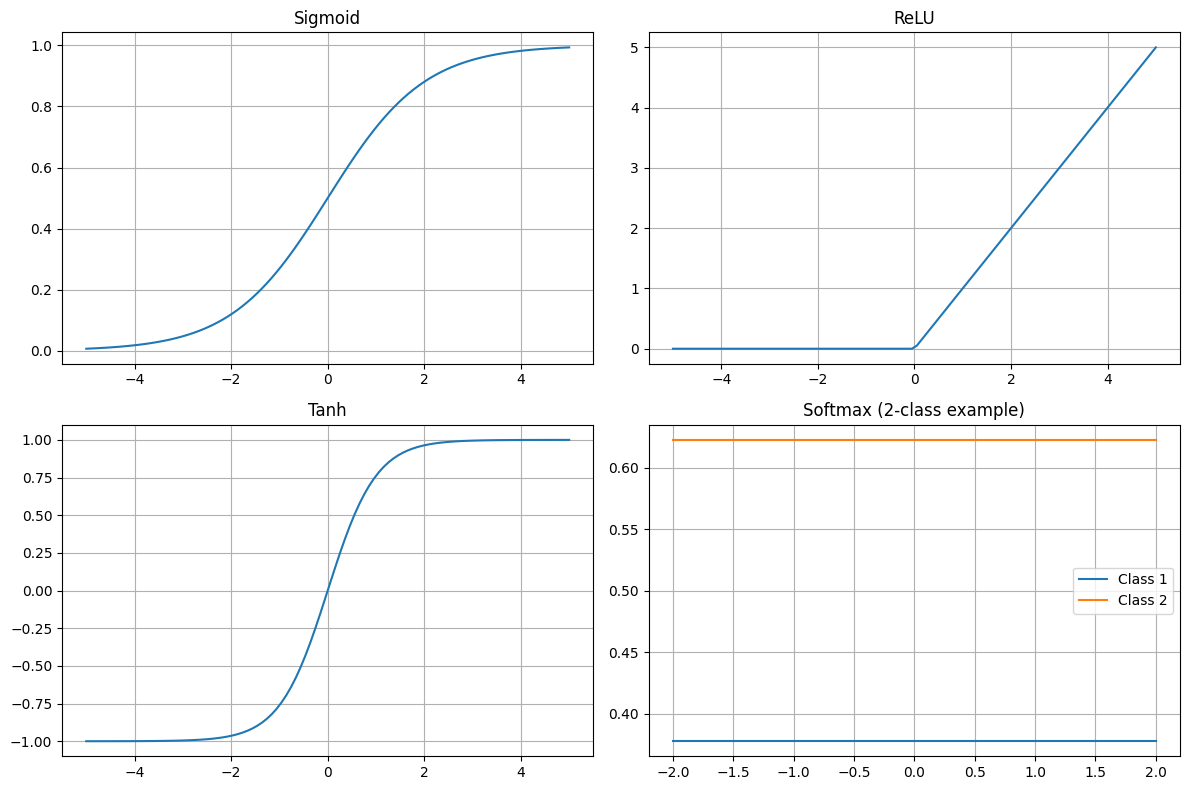

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Generate input data
x = np.linspace(-5, 5, 100)

# Create plots
plt.figure(figsize=(12, 8))

# Sigmoid
plt.subplot(2, 2, 1)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid')
plt.grid(True)

# ReLU
plt.subplot(2, 2, 2)
plt.plot(x, relu(x))
plt.title('ReLU')
plt.grid(True)

# Tanh
plt.subplot(2, 2, 3)
plt.plot(x, tanh(x))
plt.title('Tanh')
plt.grid(True)

# Softmax (using a 2D example for visualization)
plt.subplot(2, 2, 4)
x_2d = np.array([[x, x+0.5] for x in np.linspace(-2, 2, 100)])
plt.plot(x_2d[:,0], softmax(x_2d)[:,0], label='Class 1')
plt.plot(x_2d[:,0], softmax(x_2d)[:,1], label='Class 2')
plt.title('Softmax (2-class example)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

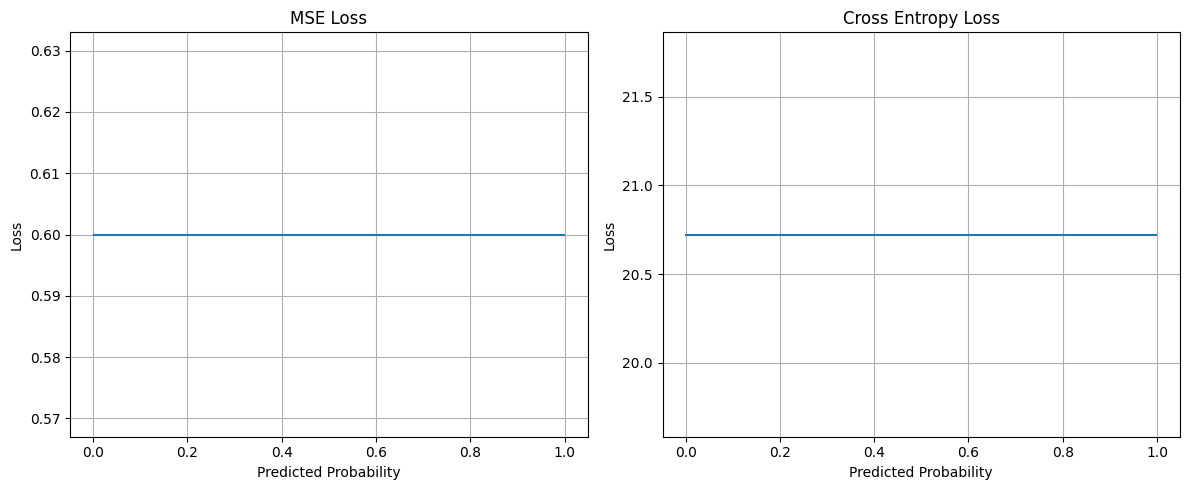

In [2]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def cross_entropy(y_true, y_pred):
    # Clip predictions to avoid log(0)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Generate true labels (binary classification)
y_true = np.array([0, 1, 1, 0, 1])

# Generate prediction range
pred_range = np.linspace(0.001, 0.999, 100)

# Calculate losses for each prediction
mse_losses = [mse(y_true, np.full_like(y_true, p)) for p in pred_range]
ce_losses = [cross_entropy(y_true, np.full_like(y_true, p)) for p in pred_range]

# Create plots
plt.figure(figsize=(12, 5))

# MSE
plt.subplot(1, 2, 1)
plt.plot(pred_range, mse_losses)
plt.title('MSE Loss')
plt.xlabel('Predicted Probability')
plt.ylabel('Loss')
plt.grid(True)

# Cross Entropy
plt.subplot(1, 2, 2)
plt.plot(pred_range, ce_losses)
plt.title('Cross Entropy Loss')
plt.xlabel('Predicted Probability')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

Epoch 0/100, Loss: 1.0960
Epoch 10/100, Loss: 0.8722
Epoch 20/100, Loss: 0.7512
Epoch 30/100, Loss: 0.6565
Epoch 40/100, Loss: 0.5855
Epoch 50/100, Loss: 0.5342
Epoch 60/100, Loss: 0.5034
Epoch 70/100, Loss: 0.4820
Epoch 80/100, Loss: 0.4643
Epoch 90/100, Loss: 0.4476
Epoch 99/100, Loss: 0.4347
Training Accuracy: 0.8213
Test Accuracy: 0.7550


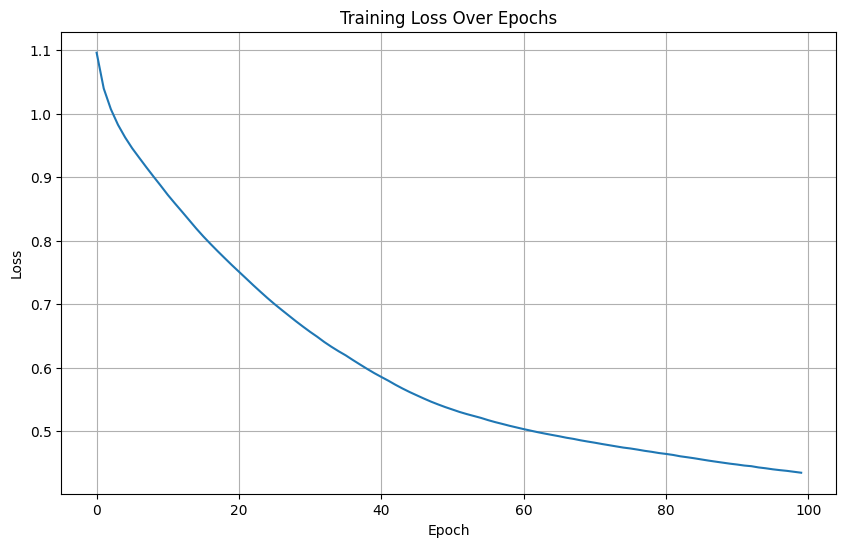

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

class NeuralNetwork:
    def __init__(self, layer_sizes, activation='sigmoid'):
        """
        Initialize neural network with given layer sizes
        layer_sizes: list of integers representing the number of neurons in each layer
        activation: activation function to use ('sigmoid', 'relu', 'tanh')
        """
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.activation = activation

        # Initialize weights and biases
        self.weights = []
        self.biases = []

        for i in range(self.num_layers - 1):
            # Xavier initialization for better convergence
            weight = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2.0 / layer_sizes[i])
            bias = np.zeros((1, layer_sizes[i+1]))
            self.weights.append(weight)
            self.biases.append(bias)

    def _sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        """Derivative of sigmoid function"""
        s = self._sigmoid(x)
        return s * (1 - s)

    def _relu(self, x):
        """ReLU activation function"""
        return np.maximum(0, x)

    def _relu_derivative(self, x):
        """Derivative of ReLU function"""
        return np.where(x > 0, 1, 0)

    def _tanh(self, x):
        """Tanh activation function"""
        return np.tanh(x)

    def _tanh_derivative(self, x):
        """Derivative of tanh function"""
        return 1 - np.tanh(x)**2

    def _softmax(self, x):
        """Softmax activation function for output layer"""
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def _activate(self, x):
        """Apply the selected activation function"""
        if self.activation == 'sigmoid':
            return self._sigmoid(x)
        elif self.activation == 'relu':
            return self._relu(x)
        elif self.activation == 'tanh':
            return self._tanh(x)
        else:
            raise ValueError(f"Unsupported activation function: {self.activation}")

    def _activate_derivative(self, x):
        """Apply the derivative of the selected activation function"""
        if self.activation == 'sigmoid':
            return self._sigmoid_derivative(x)
        elif self.activation == 'relu':
            return self._relu_derivative(x)
        elif self.activation == 'tanh':
            return self._tanh_derivative(x)
        else:
            raise ValueError(f"Unsupported activation function: {self.activation}")

    def forward(self, X):
        """Forward propagation"""
        self.layer_outputs = [X]
        self.layer_inputs = []

        for i in range(self.num_layers - 2):
            z = np.dot(self.layer_outputs[-1], self.weights[i]) + self.biases[i]
            self.layer_inputs.append(z)
            self.layer_outputs.append(self._activate(z))

        # Output layer with softmax
        z = np.dot(self.layer_outputs[-1], self.weights[-1]) + self.biases[-1]
        self.layer_inputs.append(z)
        self.layer_outputs.append(self._softmax(z))

        return self.layer_outputs[-1]

    def compute_loss(self, y_true, y_pred, loss_type='cross_entropy'):
        """
        Compute loss between true labels and predictions
        loss_type: 'mse' or 'cross_entropy'
        """
        if loss_type == 'mse':
            return np.mean(np.square(y_true - y_pred))
        elif loss_type == 'cross_entropy':
            # Add small epsilon to avoid log(0)
            epsilon = 1e-15
            y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
            return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
        else:
            raise ValueError(f"Unsupported loss type: {loss_type}")

    def backward(self, X, y, learning_rate=0.01):
        """Backward propagation and weight update"""
        m = X.shape[0]  # Number of samples

        # Compute gradient for output layer
        dz = self.layer_outputs[-1] - y

        # Initialize gradients
        dW = [np.zeros_like(w) for w in self.weights]
        db = [np.zeros_like(b) for b in self.biases]

        # Output layer gradients
        dW[-1] = np.dot(self.layer_outputs[-2].T, dz) / m
        db[-1] = np.sum(dz, axis=0, keepdims=True) / m

        # Backpropagate through hidden layers
        for i in range(self.num_layers - 3, -1, -1):
            # Compute derivative of activation function
            activation_derivative = self._activate_derivative(self.layer_inputs[i])

            # Compute error for current layer
            dz = np.dot(dz, self.weights[i+1].T) * activation_derivative

            # Update gradients
            dW[i] = np.dot(self.layer_outputs[i].T, dz) / m
            db[i] = np.sum(dz, axis=0, keepdims=True) / m

        # Update weights and biases
        for i in range(self.num_layers - 1):
            self.weights[i] -= learning_rate * dW[i]
            self.biases[i] -= learning_rate * db[i]

    def train(self, X, y, epochs=100, learning_rate=0.01, batch_size=32, verbose=True):
        """Train the neural network using backpropagation"""
        losses = []

        for epoch in range(epochs):
            # Mini-batch gradient descent
            indices = np.random.permutation(X.shape[0])
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                # Forward propagation
                y_pred = self.forward(X_batch)

                # Compute loss
                loss = self.compute_loss(y_batch, y_pred)

                # Backward propagation
                self.backward(X_batch, y_batch, learning_rate)

            # Compute loss for the entire dataset
            y_pred_full = self.forward(X)
            loss_full = self.compute_loss(y, y_pred_full)
            losses.append(loss_full)

            if verbose and (epoch % 10 == 0 or epoch == epochs - 1):
                print(f"Epoch {epoch}/{epochs}, Loss: {loss_full:.4f}")

        return losses

    def predict(self, X):
        """Make predictions"""
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

    def accuracy(self, X, y):
        """Compute accuracy"""
        predictions = self.predict(X)
        true_labels = np.argmax(y, axis=1)
        return np.mean(predictions == true_labels)

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=5, random_state=42)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Create and train the neural network
nn = NeuralNetwork(layer_sizes=[10, 8, 6, 3], activation='relu')

# Train the network
losses = nn.train(X_train, y_train, epochs=100, learning_rate=0.01, batch_size=32)

# Evaluate the network
train_acc = nn.accuracy(X_train, y_train)
test_acc = nn.accuracy(X_test, y_test)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


Training with SGD optimizer:
Epoch 0/100, Loss: 0.4154, Accuracy: 0.8438, Time: 0.01s
Epoch 10/100, Loss: 0.2817, Accuracy: 0.8612, Time: 0.01s
Epoch 20/100, Loss: 0.2693, Accuracy: 0.8738, Time: 0.01s
Epoch 30/100, Loss: 0.2586, Accuracy: 0.8825, Time: 0.01s
Epoch 40/100, Loss: 0.2471, Accuracy: 0.8862, Time: 0.01s
Epoch 50/100, Loss: 0.2325, Accuracy: 0.8975, Time: 0.00s
Epoch 60/100, Loss: 0.2194, Accuracy: 0.9075, Time: 0.00s
Epoch 70/100, Loss: 0.2060, Accuracy: 0.9187, Time: 0.00s
Epoch 80/100, Loss: 0.1926, Accuracy: 0.9225, Time: 0.00s
Epoch 90/100, Loss: 0.1790, Accuracy: 0.9287, Time: 0.00s
Epoch 99/100, Loss: 0.1660, Accuracy: 0.9375, Time: 0.00s
Training Accuracy: 0.9375
Test Accuracy: 0.9450

Training with MOMENTUM optimizer:
Epoch 0/100, Loss: 0.5197, Accuracy: 0.6613, Time: 0.00s
Epoch 10/100, Loss: 0.2730, Accuracy: 0.8812, Time: 0.00s
Epoch 20/100, Loss: 0.2421, Accuracy: 0.8925, Time: 0.00s
Epoch 30/100, Loss: 0.2245, Accuracy: 0.9000, Time: 0.00s
Epoch 40/100, Loss:

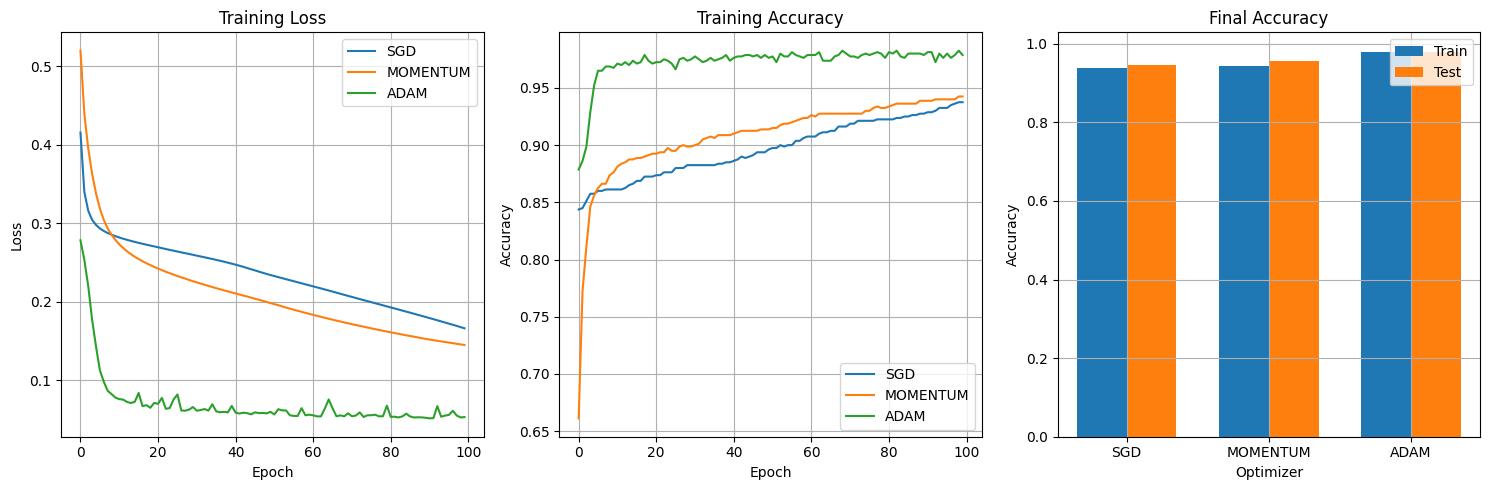


Summary of Results:
------------------------------------------------------------
Optimizer  Train Acc  Test Acc   Total Time (s) 
------------------------------------------------------------
SGD        0.9375     0.9450     0.66           
MOMENTUM   0.9425     0.9550     0.45           
ADAM       0.9788     0.9800     0.58           
------------------------------------------------------------


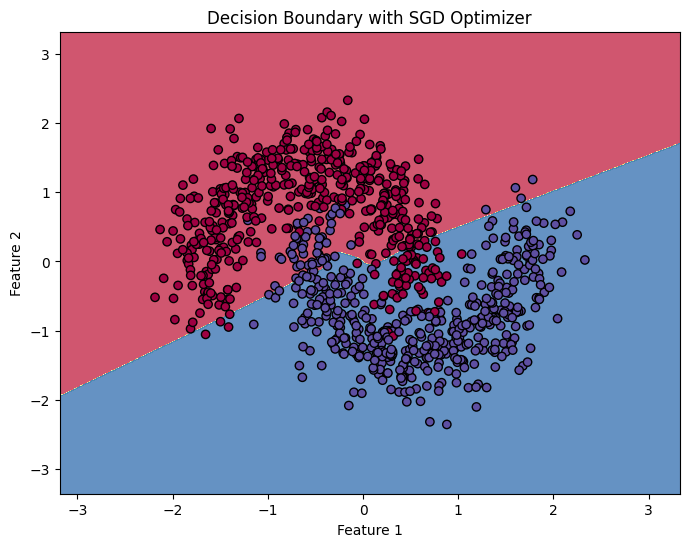

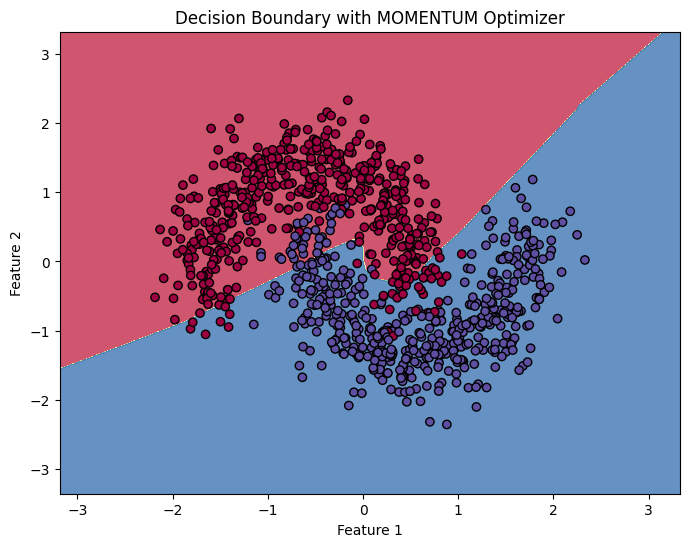

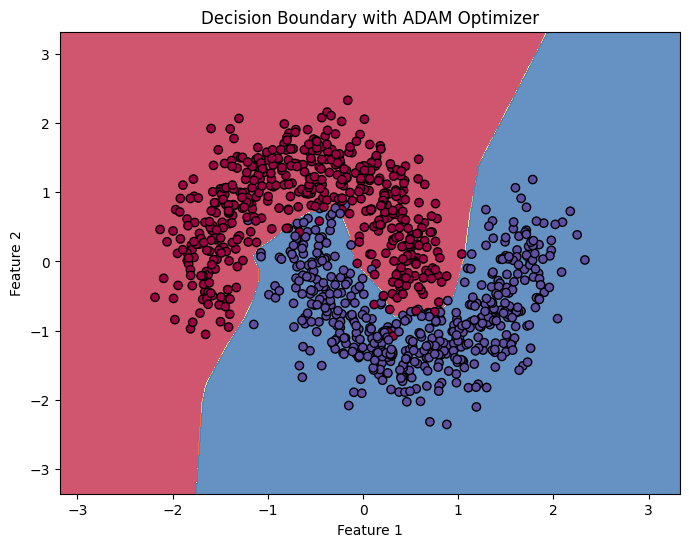

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import time

class OptimizerNeuralNetwork:
    def __init__(self, layer_sizes, activation='relu'):
        """
        Initialize neural network with given layer sizes
        layer_sizes: list of integers representing the number of neurons in each layer
        activation: activation function to use ('sigmoid', 'relu', 'tanh')
        """
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.activation = activation

        # Initialize weights and biases
        self.weights = []
        self.biases = []

        for i in range(self.num_layers - 1):
            # Xavier initialization for better convergence
            weight = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2.0 / layer_sizes[i])
            bias = np.zeros((1, layer_sizes[i+1]))
            self.weights.append(weight)
            self.biases.append(bias)

        # Initialize optimizer parameters
        self.momentum_weights = [np.zeros_like(w) for w in self.weights]
        self.momentum_biases = [np.zeros_like(b) for b in self.biases]
        self.v_weights = [np.zeros_like(w) for w in self.weights]
        self.v_biases = [np.zeros_like(b) for b in self.biases]
        self.s_weights = [np.zeros_like(w) for w in self.weights]
        self.s_biases = [np.zeros_like(b) for b in self.biases]

    def _sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        """Derivative of sigmoid function"""
        s = self._sigmoid(x)
        return s * (1 - s)

    def _relu(self, x):
        """ReLU activation function"""
        return np.maximum(0, x)

    def _relu_derivative(self, x):
        """Derivative of ReLU function"""
        return np.where(x > 0, 1, 0)

    def _tanh(self, x):
        """Tanh activation function"""
        return np.tanh(x)

    def _tanh_derivative(self, x):
        """Derivative of tanh function"""
        return 1 - np.tanh(x)**2

    def _softmax(self, x):
        """Softmax activation function for output layer"""
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def _activate(self, x):
        """Apply the selected activation function"""
        if self.activation == 'sigmoid':
            return self._sigmoid(x)
        elif self.activation == 'relu':
            return self._relu(x)
        elif self.activation == 'tanh':
            return self._tanh(x)
        else:
            raise ValueError(f"Unsupported activation function: {self.activation}")

    def _activate_derivative(self, x):
        """Apply the derivative of the selected activation function"""
        if self.activation == 'sigmoid':
            return self._sigmoid_derivative(x)
        elif self.activation == 'relu':
            return self._relu_derivative(x)
        elif self.activation == 'tanh':
            return self._tanh_derivative(x)
        else:
            raise ValueError(f"Unsupported activation function: {self.activation}")

    def forward(self, X):
        """Forward propagation"""
        self.layer_outputs = [X]
        self.layer_inputs = []

        for i in range(self.num_layers - 2):
            z = np.dot(self.layer_outputs[-1], self.weights[i]) + self.biases[i]
            self.layer_inputs.append(z)
            self.layer_outputs.append(self._activate(z))

        # Output layer with softmax
        z = np.dot(self.layer_outputs[-1], self.weights[-1]) + self.biases[-1]
        self.layer_inputs.append(z)
        self.layer_outputs.append(self._softmax(z))

        return self.layer_outputs[-1]

    def compute_loss(self, y_true, y_pred, loss_type='cross_entropy'):
        """
        Compute loss between true labels and predictions
        loss_type: 'mse' or 'cross_entropy'
        """
        if loss_type == 'mse':
            return np.mean(np.square(y_true - y_pred))
        elif loss_type == 'cross_entropy':
            # Add small epsilon to avoid log(0)
            epsilon = 1e-15
            y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
            return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
        else:
            raise ValueError(f"Unsupported loss type: {loss_type}")

    def backward(self, X, y):
        """Backward propagation to compute gradients"""
        m = X.shape[0]  # Number of samples

        # Compute gradient for output layer
        dz = self.layer_outputs[-1] - y

        # Initialize gradients
        dW = [np.zeros_like(w) for w in self.weights]
        db = [np.zeros_like(b) for b in self.biases]

        # Output layer gradients
        dW[-1] = np.dot(self.layer_outputs[-2].T, dz) / m
        db[-1] = np.sum(dz, axis=0, keepdims=True) / m

        # Backpropagate through hidden layers
        for i in range(self.num_layers - 3, -1, -1):
            # Compute derivative of activation function
            activation_derivative = self._activate_derivative(self.layer_inputs[i])

            # Compute error for current layer
            dz = np.dot(dz, self.weights[i+1].T) * activation_derivative

            # Update gradients
            dW[i] = np.dot(self.layer_outputs[i].T, dz) / m
            db[i] = np.sum(dz, axis=0, keepdims=True) / m

        return dW, db

    def update_weights_sgd(self, dW, db, learning_rate):
        """Update weights using SGD optimizer"""
        for i in range(self.num_layers - 1):
            self.weights[i] -= learning_rate * dW[i]
            self.biases[i] -= learning_rate * db[i]

    def update_weights_momentum(self, dW, db, learning_rate, beta=0.9):
        """Update weights using Momentum optimizer"""
        for i in range(self.num_layers - 1):
            # Update momentum
            self.momentum_weights[i] = beta * self.momentum_weights[i] + (1 - beta) * dW[i]
            self.momentum_biases[i] = beta * self.momentum_biases[i] + (1 - beta) * db[i]

            # Update weights and biases
            self.weights[i] -= learning_rate * self.momentum_weights[i]
            self.biases[i] -= learning_rate * self.momentum_biases[i]

    def update_weights_adam(self, dW, db, learning_rate, t, beta1=0.9, beta2=0.999, epsilon=1e-8):
        """Update weights using Adam optimizer"""
        for i in range(self.num_layers - 1):
            # Update biased first moment estimate
            self.momentum_weights[i] = beta1 * self.momentum_weights[i] + (1 - beta1) * dW[i]
            self.momentum_biases[i] = beta1 * self.momentum_biases[i] + (1 - beta1) * db[i]

            # Update biased second raw moment estimate
            self.v_weights[i] = beta2 * self.v_weights[i] + (1 - beta2) * (dW[i]**2)
            self.v_biases[i] = beta2 * self.v_biases[i] + (1 - beta2) * (db[i]**2)

            # Compute bias-corrected first moment estimate
            m_hat_w = self.momentum_weights[i] / (1 - beta1**t)
            m_hat_b = self.momentum_biases[i] / (1 - beta1**t)

            # Compute bias-corrected second raw moment estimate
            v_hat_w = self.v_weights[i] / (1 - beta2**t)
            v_hat_b = self.v_biases[i] / (1 - beta2**t)

            # Update weights and biases
            self.weights[i] -= learning_rate * m_hat_w / (np.sqrt(v_hat_w) + epsilon)
            self.biases[i] -= learning_rate * m_hat_b / (np.sqrt(v_hat_b) + epsilon)

    def train(self, X, y, epochs=100, learning_rate=0.01, batch_size=32, optimizer='sgd', verbose=True):
        """Train the neural network using the specified optimizer"""
        losses = []
        accuracies = []
        times = []
        t = 0  # Time step for Adam

        for epoch in range(epochs):
            start_time = time.time()

            # Mini-batch gradient descent
            indices = np.random.permutation(X.shape[0])
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                # Forward propagation
                y_pred = self.forward(X_batch)

                # Backward propagation to compute gradients
                dW, db = self.backward(X_batch, y_batch)

                # Update weights using the specified optimizer
                t += 1
                if optimizer == 'sgd':
                    self.update_weights_sgd(dW, db, learning_rate)
                elif optimizer == 'momentum':
                    self.update_weights_momentum(dW, db, learning_rate)
                elif optimizer == 'adam':
                    self.update_weights_adam(dW, db, learning_rate, t)
                else:
                    raise ValueError(f"Unsupported optimizer: {optimizer}")

            # Compute loss and accuracy for the entire dataset
            y_pred_full = self.forward(X)
            loss_full = self.compute_loss(y, y_pred_full)
            losses.append(loss_full)

            # Compute accuracy
            predictions = np.argmax(y_pred_full, axis=1)
            true_labels = np.argmax(y, axis=1)
            accuracy = np.mean(predictions == true_labels)
            accuracies.append(accuracy)

            epoch_time = time.time() - start_time
            times.append(epoch_time)

            if verbose and (epoch % 10 == 0 or epoch == epochs - 1):
                print(f"Epoch {epoch}/{epochs}, Loss: {loss_full:.4f}, Accuracy: {accuracy:.4f}, Time: {epoch_time:.2f}s")

        return losses, accuracies, times

    def predict(self, X):
        """Make predictions"""
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

    def accuracy(self, X, y):
        """Compute accuracy"""
        predictions = self.predict(X)
        true_labels = np.argmax(y, axis=1)
        return np.mean(predictions == true_labels)

# Generate a synthetic dataset for demonstration
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Define network architecture
layer_sizes = [2, 10, 10, 2]

# Create and train the neural network with different optimizers
optimizers = ['sgd', 'momentum', 'adam']
results = {}

for optimizer in optimizers:
    print(f"\nTraining with {optimizer.upper()} optimizer:")
    nn = OptimizerNeuralNetwork(layer_sizes=layer_sizes, activation='relu')

    # Train the network
    losses, accuracies, times = nn.train(
        X_train, y_train,
        epochs=100,
        learning_rate=0.01,
        batch_size=32,
        optimizer=optimizer,
        verbose=True
    )

    # Evaluate the network
    train_acc = nn.accuracy(X_train, y_train)
    test_acc = nn.accuracy(X_test, y_test)
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")

    # Store results
    results[optimizer] = {
        'losses': losses,
        'accuracies': accuracies,
        'times': times,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'total_time': sum(times)
    }

# Plot comparison of loss curves
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
for optimizer in optimizers:
    plt.plot(results[optimizer]['losses'], label=optimizer.upper())
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot comparison of accuracy curves
plt.subplot(1, 3, 2)
for optimizer in optimizers:
    plt.plot(results[optimizer]['accuracies'], label=optimizer.upper())
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot comparison of final accuracies
plt.subplot(1, 3, 3)
train_accs = [results[opt]['train_acc'] for opt in optimizers]
test_accs = [results[opt]['test_acc'] for opt in optimizers]
x = np.arange(len(optimizers))
width = 0.35

plt.bar(x - width/2, train_accs, width, label='Train')
plt.bar(x + width/2, test_accs, width, label='Test')
plt.title('Final Accuracy')
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.xticks(x, [opt.upper() for opt in optimizers])
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print summary of results
print("\nSummary of Results:")
print("-" * 60)
print(f"{'Optimizer':<10} {'Train Acc':<10} {'Test Acc':<10} {'Total Time (s)':<15}")
print("-" * 60)
for optimizer in optimizers:
    print(f"{optimizer.upper():<10} {results[optimizer]['train_acc']:<10.4f} "
          f"{results[optimizer]['test_acc']:<10.4f} {results[optimizer]['total_time']:<15.2f}")
print("-" * 60)

# Plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Train a new model for each optimizer to visualize decision boundaries
for optimizer in optimizers:
    nn = OptimizerNeuralNetwork(layer_sizes=layer_sizes, activation='relu')
    nn.train(X_train, y_train, epochs=100, learning_rate=0.01, batch_size=32, optimizer=optimizer, verbose=False)
    plot_decision_boundary(nn, X, y, f"Decision Boundary with {optimizer.upper()} Optimizer")